In [1]:
import pandas as pd
import numpy as np

In [2]:
train_X = pd.read_excel('train_X.xlsx', index_col=0)
train_Y = pd.read_excel('train_Y.xlsx', index_col=0)
test_X  = pd.read_excel('test_X.xlsx',  index_col=0)
test_Y  = pd.read_excel('test_Y.xlsx',  index_col=0)

In [3]:
colu = list(train_X.columns)
colu

['img_count',
 'len_text',
 'ratio_spch',
 'ratio_whsp',
 'ratio_num',
 'price_zero',
 'day_Fri',
 'day_Thu',
 'day_Wed',
 'day_Mon',
 'day_Sun',
 'day_Sat',
 'day_Tue',
 'grade_0',
 'grade_5',
 'grade_3',
 'grade_4',
 'grade_2',
 'grade_1',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hide_0',
 'hide_1',
 'safe_True',
 'safe_False',
 'n_1',
 'n_2',
 'v_1',
 'v_2',
 'aj_1',
 'aj_2',
 'av_1',
 'av_2',
 'r_n',
 'r_v',
 'r_aj',
 'r_av']

## 평가(머신러닝)

In [4]:
from pandas import Series
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [5]:
lr = 0.1
dep = 20 #3
n = 30 #100
gbrt = GradientBoostingClassifier(learning_rate = lr, max_depth = dep, n_estimators = n, random_state = 20)
gbrt.fit(train_X, train_Y)
print("Train_Score: " + str(gbrt.score(train_X, train_Y)))
prediction = gbrt.predict(test_X)

C:\Users\dong\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train_Score: 0.9999362104770747


In [6]:
print('ROC:',       str(  roc_auc_score(test_Y, prediction)))
print('Accuracy:',  str( accuracy_score(test_Y, prediction)))

print('Recall:',    str(   recall_score(test_Y, prediction)))
print('Precision:', str(precision_score(test_Y, prediction)))
print('** F1 score **:', str(  f1_score(test_Y, prediction)))

print('clasification report:\n', str(classification_report(test_Y, prediction)))
print('confussion matrix:\n',    str(     confusion_matrix(test_Y, prediction)))

ROC: 0.9229399402720939
Accuracy: 0.9949978012313104
Recall: 0.85
Precision: 0.5565476190476191
** F1 score **: 0.672661870503597
clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36164
           1       0.56      0.85      0.67       220

    accuracy                           0.99     36384
   macro avg       0.78      0.92      0.84     36384
weighted avg       1.00      0.99      1.00     36384

confussion matrix:
 [[36015   149]
 [   33   187]]


In [7]:
import matplotlib.pyplot as plt

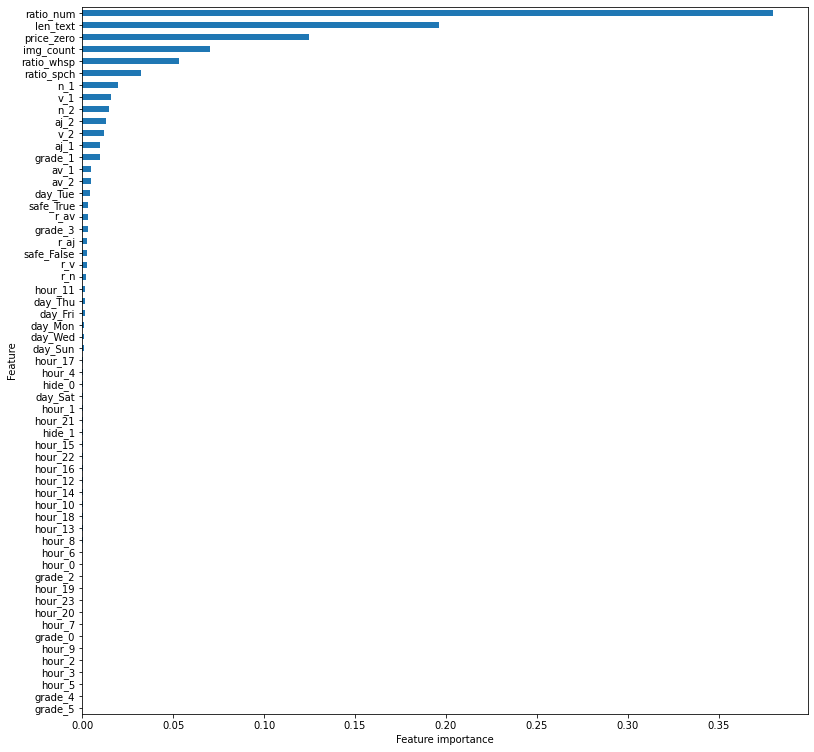

In [8]:
feature_importance = gbrt.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_X.columns)

plt.figure(figsize=(13, 13))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

#### XGBOOSTING

In [10]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import matplotlib.pylab as pl
from sklearn.datasets import dump_svmlight_file

In [11]:
dump_svmlight_file(train_X, train_Y['Final'], 'dtrain.svm', zero_based=True)
dump_svmlight_file(test_X, test_Y['Final'], 'dtest.svm', zero_based=True)
d_train = xgb.DMatrix('dtrain.svm')
d_test  = xgb.DMatrix('dtest.svm')

In [12]:
param = {'max_depth': 20, 'eta': 0.3, 'silent': 1, 'objective':'multi:softprob', 'num_class': 2} #'objective': 'multi:softprob'
model1 = xgb.train(param, d_train, 5000, evals = [(d_test, "test")], early_stopping_rounds=50)
Y_preds1 = model1.predict(d_test)
best_preds = np.asarray([np.argmax(line) for line in Y_preds1])

[23:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	test-mlogloss:0.44259
[1]	test-mlogloss:0.30402
[2]	test-mlogloss:0.21580
[3]	test-mlogloss:0.15671
[4]	test-mlogloss:0.11580
[5]	test-mlogloss:0.08647
[6]	test-mlogloss:0.06539
[7]	test-mlogloss:0.05006
[8]	test-mlogloss:0.03895
[9]	test-mlogloss:0.03057
[10]	test-mlogloss:0.02428
[11]	test-mlogloss

In [13]:
print('ROC:',       str(  roc_auc_score(test_Y, best_preds)))
print('Accuracy:',  str( accuracy_score(test_Y, best_preds)))

print('Recall:',    str(   recall_score(test_Y, best_preds)))
print('Precision:', str(precision_score(test_Y, best_preds)))
print('** F1 score **:', str(  f1_score(test_Y, best_preds)))

print('clasification report:\n', str(classification_report(test_Y, best_preds)))
print('confussion matrix:\n',    str(     confusion_matrix(test_Y, best_preds)))

ROC: 0.9180988627565334
Accuracy: 0.9988456464379947
Recall: 0.8363636363636363
Precision: 0.968421052631579
** F1 score **: 0.897560975609756
clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     36164
           1       0.97      0.84      0.90       220

    accuracy                           1.00     36384
   macro avg       0.98      0.92      0.95     36384
weighted avg       1.00      1.00      1.00     36384

confussion matrix:
 [[36158     6]
 [   36   184]]


In [14]:
best_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

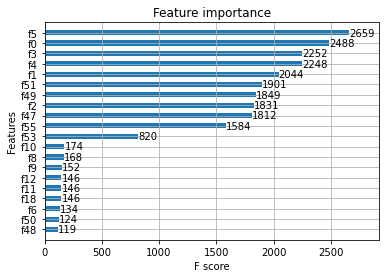

In [15]:
xgb.plot_importance(model1, max_num_features=20, height=0.5)

In [16]:
for i in [5,0,3,4,51,1,2,49,47,55,53,10,12,9,8,11,7,18,48,6]:
    print(colu[i])

price_zero
img_count
ratio_whsp
ratio_num
aj_1
len_text
ratio_spch
v_1
n_1
r_n
av_1
day_Sun
day_Tue
day_Mon
day_Wed
day_Sat
day_Thu
grade_1
n_2
day_Fri


In [17]:
import shap
from shap import TreeExplainer

# print the JS visualization code to the notebook
shap.initjs()

In [18]:
X = pd.concat([train_X,test_X])
Y = pd.concat([train_Y,test_Y])

In [25]:
explainer = shap.TreeExplainer(model1)
shap_values = explainer.shap_values(X,Y.values)

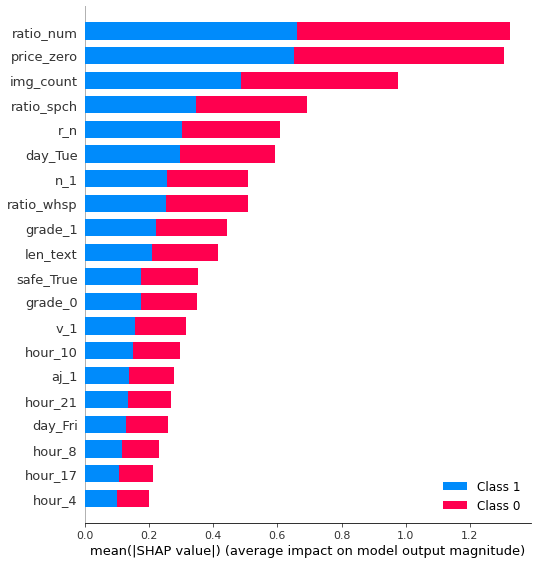

In [56]:
shap.summary_plot(shap_values, X, feature_names = colu)

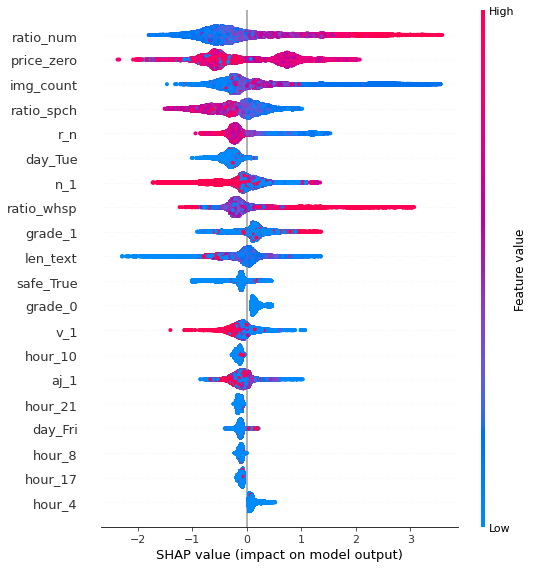

In [31]:
shap.summary_plot(shap_values[1], X, feature_names = colu)

In [59]:
b = ['ratio_num','price_zero','img_count','ratio_spch','r_n','day_Tue','n_1','ratio_whsp','grade_1','len_text','safe_True','grade_0','v_1','hour_10','aj_1','hour_21','day_Fri','hour_8','hour_17','hour_4']
len(b)

20

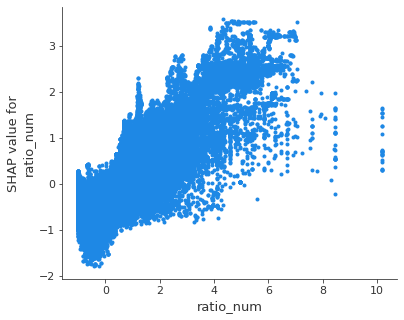

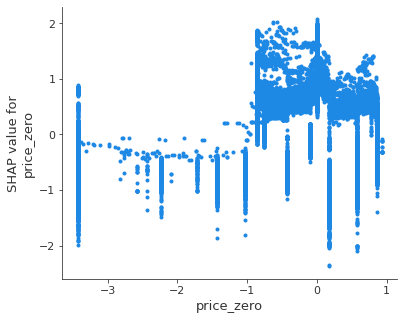

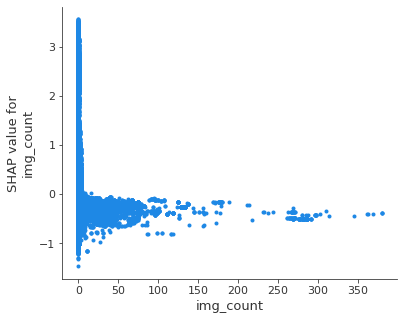

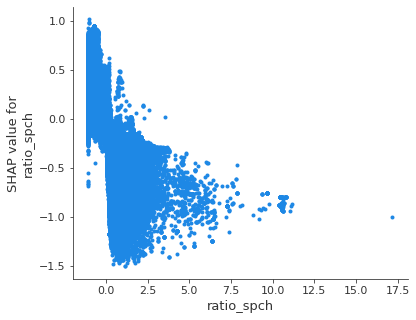

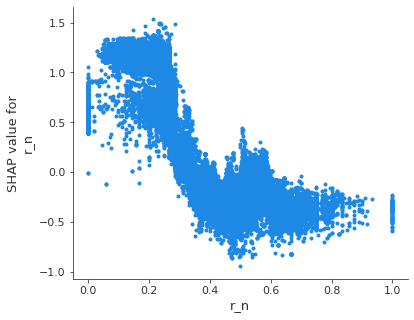

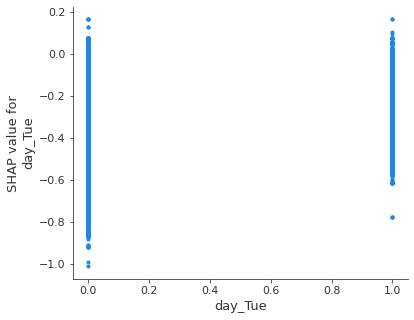

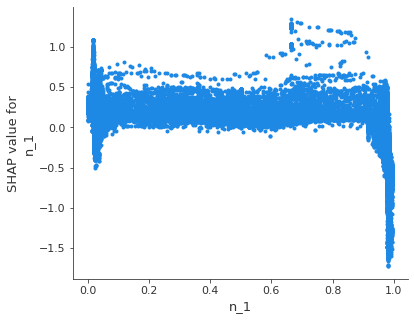

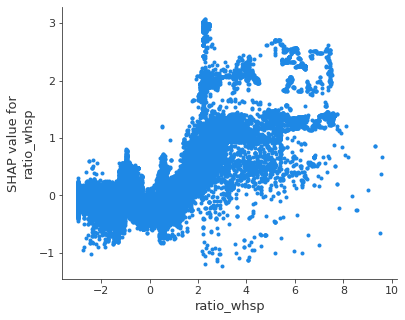

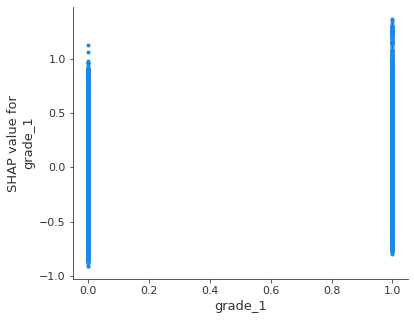

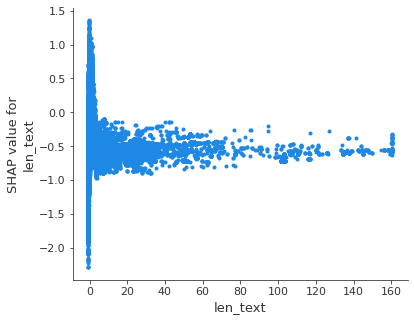

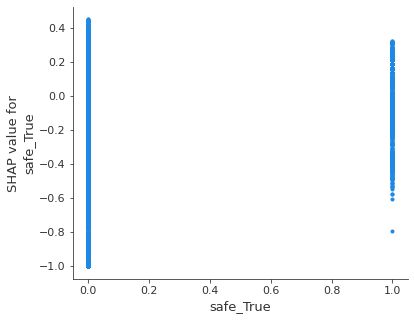

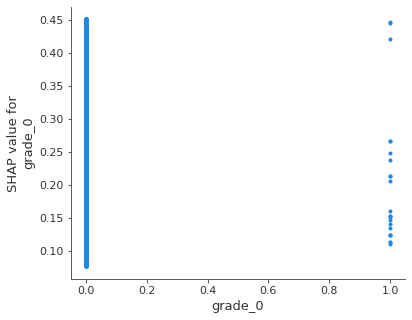

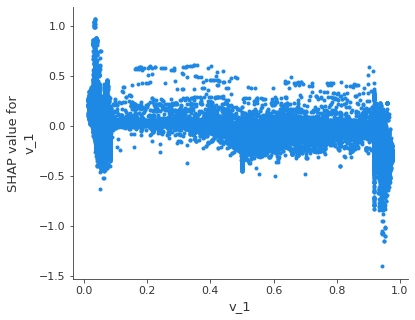

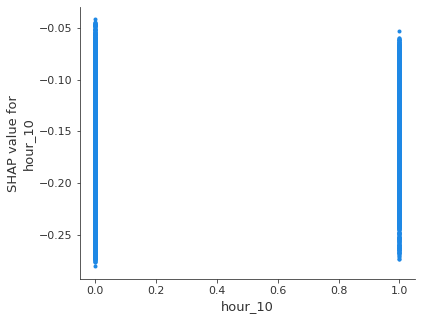

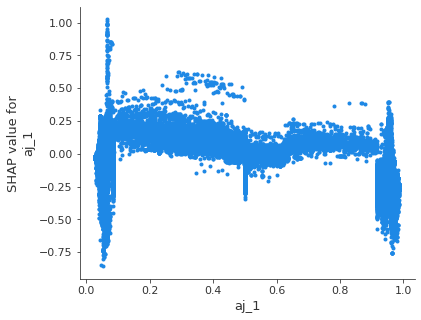

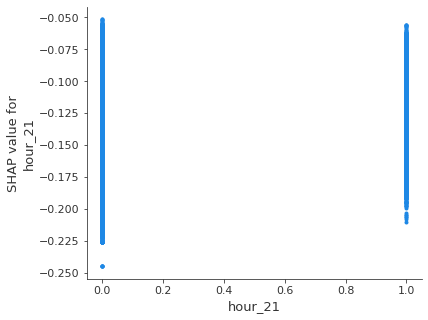

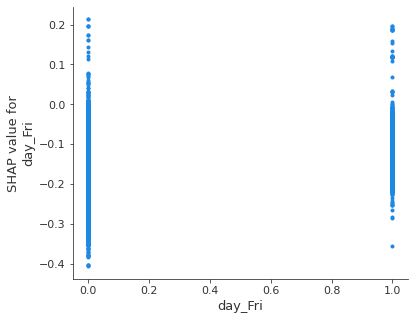

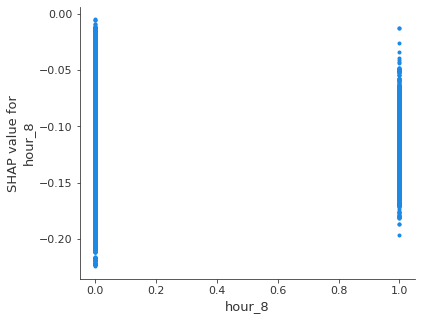

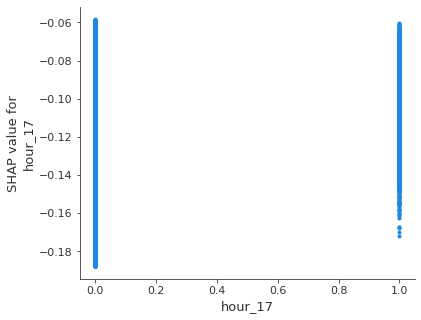

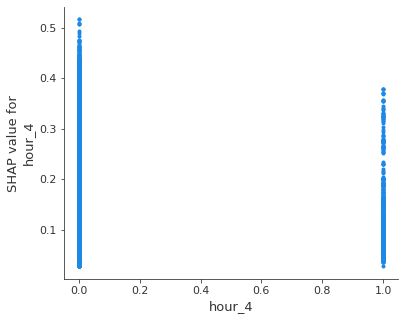

In [58]:
for i in b:
    shap.dependence_plot(i, shap_values[1], features = X, feature_names = colu, interaction_index = None)